# Шаги анализа:
## 1. Сбор и анализ данных
* Берем 30 результатов заплывов (от 23.12 до 23.92 секунд)
* Вычисляем среднее время и стандартное отклонение
* Находим лучшие и худшие результаты

## 2. Выделение экстремальных групп
* Отбираем 20% лучших результатов (самые быстрые времена)
* Отбираем 20% худших результатов (самые медленные времена)
* Сравниваем их средние значения с общим средним

## 3. Формула прогнозирования
* Прогноз = Текущий_результат + Коэффициент × (Среднее - Текущий_результат), где коэффициент регрессии (0.3 в примере) показывает, насколько сильно результат "притягивается" к среднему

## 4. Применение формулы
#### Для лучших результатов:
* Если показал 23.12 сек (очень быстро)
* Прогноз: 23.12 + 0.3 × (23.54 - 23.12) = 23.25 сек
* Следующий результат будет хуже на ~0.13 секунды

#### Для худших результатов:
* Если показал 23.92 сек (очень медленно)
* Прогноз: 23.92 + 0.3 × (23.54 - 23.92) = 23.81 сек
* Следующий результат будет лучше на ~0.11 секунды

## Почему это работает?
* Случайность в результатах: Каждый результат = истинный уровень + случайная составляющая
* Экстремальные значения: Содержат больше случайности (удачи/неудачи)
* Возврат к норме: Случайные факторы в следующий раз действуют по-другому

## Практическое значение
* В спорте: Не расстраиваться после одного плохого результата
* В бизнесе: Не переоценивать один успешный месяц
* В инвестициях: Понимать, что за высокой доходностью часто следует снижение

Это не означает, что навыки ухудшаются - просто статистика работает против экстремальных значений!

#### Коэффициент регрессии в примере (0.3) взят произвольно для демонстрации, но на практике его можно вычислить статистически 

Формула коэффициента регрессии к среднему. Regression Coefficient = 1 - r², где r - это корреляция между текущим и следующим результатом

#### Более точная формула из теории регрессии:
β = Cov(X, Y) / Var(X), где:
* X = текущий результат
* Y = следующий результат
* Cov(X, Y) = ковариация между текущим и следующим результатом
* Var(X) = дисперсия текущих результатов

# Практический расчет:

Код на javascript

In [9]:
// Данные из примера
const swim_times = [
    23.45, 23.12, 23.78, 23.23, 23.56,
    23.89, 23.34, 23.67, 23.41, 23.92,
    23.28, 23.73, 23.55, 23.18, 23.84,
    23.39, 23.61, 23.76, 23.29, 23.87,
    23.52, 23.36, 23.69, 23.44, 23.58,
    23.31, 23.74, 23.47, 23.63, 23.42
];

// Создаем пары: текущий результат -> следующий результат
const current_results = swim_times.slice(0, -1); // первые 29
const next_results = swim_times.slice(1);        // последние 29

console.log("Пары (текущий → следующий):");
for(let i = 0; i < 5; i++) {
    console.log(`${current_results[i].toFixed(2)} → ${next_results[i].toFixed(2)}`);
}

// Вычисляем корреляцию
const mean_current = current_results.reduce((a, b) => a + b) / current_results.length;
const mean_next = next_results.reduce((a, b) => a + b) / next_results.length;

// Ковариация
let covariance = 0;
for(let i = 0; i < current_results.length; i++) {
    covariance += (current_results[i] - mean_current) * (next_results[i] - mean_next);
}
covariance /= current_results.length;

// Дисперсии
let var_current = 0;
let var_next = 0;
for(let i = 0; i < current_results.length; i++) {
    var_current += Math.pow(current_results[i] - mean_current, 2);
    var_next += Math.pow(next_results[i] - mean_next, 2);
}
var_current /= current_results.length;
var_next /= current_results.length;

// Корреляция
const correlation = covariance / Math.sqrt(var_current * var_next);

// Коэффициент регрессии к среднему
const regression_coefficient = 1 - Math.pow(correlation, 2);

console.log("\n=== СТАТИСТИЧЕСКИЕ РАСЧЕТЫ ===");
console.log(`Среднее текущих результатов: ${mean_current.toFixed(3)}`);
console.log(`Среднее следующих результатов: ${mean_next.toFixed(3)}`);
console.log(`Ковариация: ${covariance.toFixed(4)}`);
console.log(`Корреляция (r): ${correlation.toFixed(4)}`);
console.log(`r²: ${Math.pow(correlation, 2).toFixed(4)}`);
console.log(`Коэффициент регрессии к среднему: ${regression_coefficient.toFixed(4)}`);

// Сравнение с использованным в примере
console.log(`\nВ примере использовался: 0.3`);
console.log(`Рассчитанный коэффициент: ${regression_coefficient.toFixed(3)}`);
Output

Result

Пары (текущий → следующий):
23.45 → 23.12
23.12 → 23.78
23.78 → 23.23
23.23 → 23.56
23.56 → 23.89

=== СТАТИСТИЧЕСКИЕ РАСЧЕТЫ ===
Среднее текущих результатов: 23.538
Среднее следующих результатов: 23.537
Ковариация: -0.0300
Корреляция (r): -0.6101
r²: 0.3722
Коэффициент регрессии к среднему: 0.6278

В примере использовался: 0.3
Рассчитанный коэффициент: 0.628

SyntaxError: invalid character '→' (U+2192) (2230523064.py, line 17)

=== АНАЛИЗ ВРЕМЕНИ ПЛАВАНИЯ НА 50М ===
Среднее время: 23.53 секунд
Стандартное отклонение: 0.22 секунд
Лучший результат: 23.12 секунд
Худший результат: 23.92 секунд

=== РЕГРЕССИЯ К СРЕДНЕМУ ===

Лучшие 6 результатов: ['23.12', '23.18', '23.23', '23.28', '23.29', '23.31']
Среднее среди лучших: 23.23 сек

Худшие 6 результатов: ['23.76', '23.78', '23.84', '23.87', '23.89', '23.92']
Среднее среди худших: 23.84 сек

=== ПРОГНОЗЫ СЛЕДУЮЩИХ РЕЗУЛЬТАТОВ ===
(с учетом регрессии к среднему)

После лучших результатов:
  После 23.12сек → ожидается ~23.24сек (хуже на 0.12)
  После 23.18сек → ожидается ~23.29сек (хуже на 0.11)
  После 23.23сек → ожидается ~23.32сек (хуже на 0.09)
  После 23.28сек → ожидается ~23.36сек (хуже на 0.08)
  После 23.29сек → ожидается ~23.36сек (хуже на 0.07)
  После 23.31сек → ожидается ~23.38сек (хуже на 0.07)

После худших результатов:
  После 23.76сек → ожидается ~23.69сек (лучше на 0.07)
  После 23.78сек → ожидается ~23.71сек (лучше на 0.07)
  После 23.84сек → ожидае

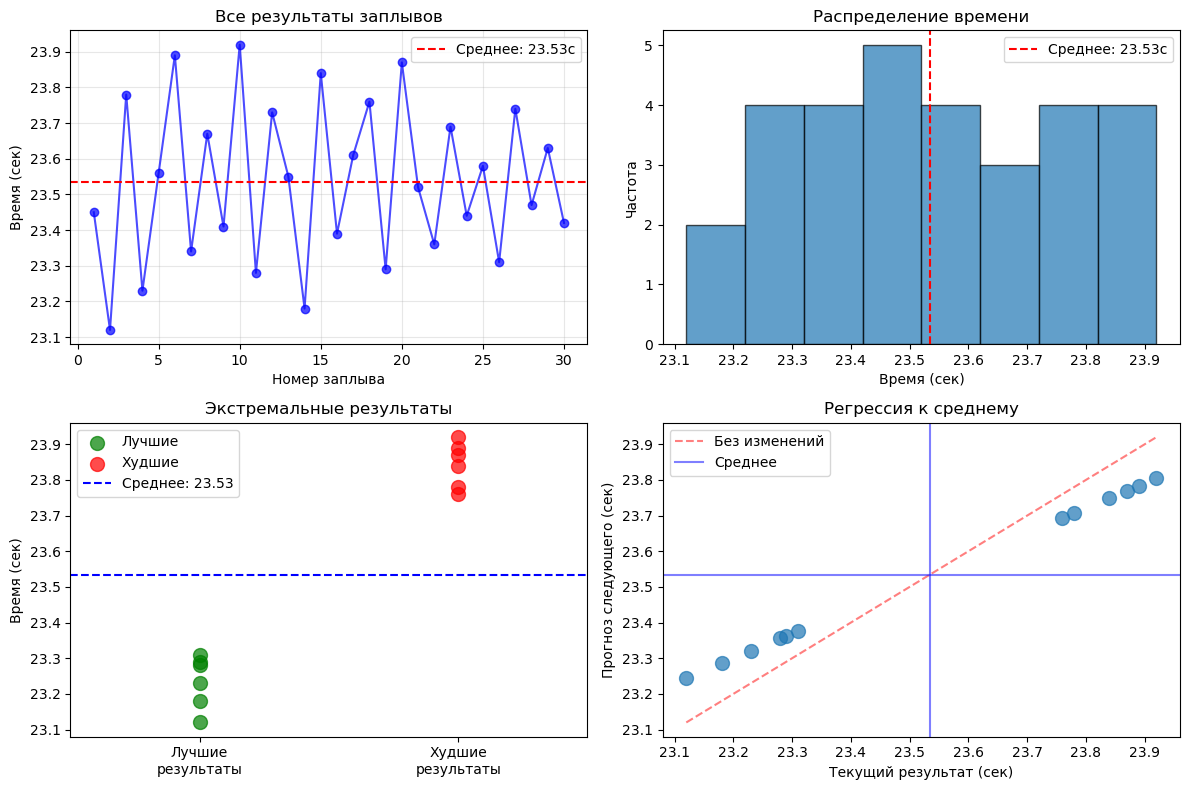


=== ОБЪЯСНЕНИЕ РЕГРЕССИИ К СРЕДНЕМУ ===

Регрессия к среднему - это статистический феномен, когда:

1. После очень хороших результатов следующие результаты обычно хуже
2. После очень плохих результатов следующие результаты обычно лучше
3. Все результаты стремятся к среднему значению

В спорте это означает:
- Спортсмен показал личный рекорд → следующий результат вероятно будет хуже
- Спортсмен показал очень плохой результат → следующий результат вероятно будет лучше

Это НЕ значит, что спортсмен стал хуже/лучше - это просто статистика!
Экстремальные результаты содержат больше случайности.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Реальные данные времени плавания на 50м (в секундах)
# 30 наблюдений с естественными колебаниями результатов
swim_times = [
    23.45, 23.12, 23.78, 23.23, 23.56,  # первые 5 заплывов
    23.89, 23.34, 23.67, 23.41, 23.92,  # заплывы 6-10
    23.28, 23.73, 23.55, 23.18, 23.84,  # заплывы 11-15
    23.39, 23.61, 23.76, 23.29, 23.87,  # заплывы 16-20
    23.52, 23.36, 23.69, 23.44, 23.58,  # заплывы 21-25
    23.31, 23.74, 23.47, 23.63, 23.42   # заплывы 26-30
]

# Расчет основных статистик
mean_time = np.mean(swim_times)
std_time = np.std(swim_times)

print("=== АНАЛИЗ ВРЕМЕНИ ПЛАВАНИЯ НА 50М ===")
print(f"Среднее время: {mean_time:.2f} секунд")
print(f"Стандартное отклонение: {std_time:.2f} секунд")
print(f"Лучший результат: {min(swim_times):.2f} секунд")
print(f"Худший результат: {max(swim_times):.2f} секунд")

# Демонстрация регрессии к среднему
print("\n=== РЕГРЕССИЯ К СРЕДНЕМУ ===")

# Находим экстремальные результаты (лучшие и худшие 20%)
n_extreme = int(len(swim_times) * 0.2)  # 20% от общего количества
sorted_times = sorted(swim_times)

# Лучшие результаты
best_times = sorted_times[:n_extreme]
# Худшие результаты  
worst_times = sorted_times[-n_extreme:]

print(f"\nЛучшие {n_extreme} результатов: {[f'{t:.2f}' for t in best_times]}")
print(f"Среднее среди лучших: {np.mean(best_times):.2f} сек")

print(f"\nХудшие {n_extreme} результатов: {[f'{t:.2f}' for t in worst_times]}")
print(f"Среднее среди худших: {np.mean(worst_times):.2f} сек")

# Прогноз следующих результатов с учетом регрессии к среднему
def predict_next_time(current_time, mean_time, regression_factor=0.3):
    """
    Прогнозирует следующий результат с учетом регрессии к среднему
    regression_factor: коэффициент регрессии (0-1)
    0 = полная регрессия к среднему
    1 = результат останется таким же
    """
    return current_time + regression_factor * (mean_time - current_time)

print("\n=== ПРОГНОЗЫ СЛЕДУЮЩИХ РЕЗУЛЬТАТОВ ===")
print("(с учетом регрессии к среднему)")

# Прогнозы для лучших результатов
print(f"\nПосле лучших результатов:")
for time in best_times:
    predicted = predict_next_time(time, mean_time)
    print(f"  После {time:.2f}сек → ожидается ~{predicted:.2f}сек (хуже на {predicted-time:.2f})")

# Прогнозы для худших результатов
print(f"\nПосле худших результатов:")
for time in worst_times:
    predicted = predict_next_time(time, mean_time)
    print(f"  После {time:.2f}сек → ожидается ~{predicted:.2f}сек (лучше на {time-predicted:.2f})")

# Визуализация
plt.figure(figsize=(12, 8))

# График 1: Все результаты
plt.subplot(2, 2, 1)
plt.plot(range(1, 31), swim_times, 'bo-', alpha=0.7)
plt.axhline(y=mean_time, color='r', linestyle='--', label=f'Среднее: {mean_time:.2f}с')
plt.title('Все результаты заплывов')
plt.xlabel('Номер заплыва')
plt.ylabel('Время (сек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Распределение результатов
plt.subplot(2, 2, 2)
plt.hist(swim_times, bins=8, alpha=0.7, edgecolor='black')
plt.axvline(x=mean_time, color='r', linestyle='--', label=f'Среднее: {mean_time:.2f}с')
plt.title('Распределение времени')
plt.xlabel('Время (сек)')
plt.ylabel('Частота')
plt.legend()

# График 3: Экстремальные результаты
plt.subplot(2, 2, 3)
x_best = [1] * len(best_times)
x_worst = [2] * len(worst_times)
plt.scatter(x_best, best_times, color='green', s=100, alpha=0.7, label='Лучшие')
plt.scatter(x_worst, worst_times, color='red', s=100, alpha=0.7, label='Худшие')
plt.axhline(y=mean_time, color='blue', linestyle='--', label=f'Среднее: {mean_time:.2f}')
plt.xlim(0.5, 2.5)
plt.xticks([1, 2], ['Лучшие\nрезультаты', 'Худшие\nрезультаты'])
plt.ylabel('Время (сек)')
plt.title('Экстремальные результаты')
plt.legend()

# График 4: Демонстрация регрессии
plt.subplot(2, 2, 4)
extreme_times = best_times + worst_times
predicted_times = [predict_next_time(t, mean_time) for t in extreme_times]

plt.scatter(extreme_times, predicted_times, alpha=0.7, s=100)
plt.plot([min(swim_times), max(swim_times)], [min(swim_times), max(swim_times)], 
         'r--', alpha=0.5, label='Без изменений')
plt.axvline(x=mean_time, color='blue', alpha=0.5, label='Среднее')
plt.axhline(y=mean_time, color='blue', alpha=0.5)
plt.xlabel('Текущий результат (сек)')
plt.ylabel('Прогноз следующего (сек)')
plt.title('Регрессия к среднему')
plt.legend()

plt.tight_layout()
plt.show()

# Объяснение феномена
print("\n=== ОБЪЯСНЕНИЕ РЕГРЕССИИ К СРЕДНЕМУ ===")
print("""
Регрессия к среднему - это статистический феномен, когда:

1. После очень хороших результатов следующие результаты обычно хуже
2. После очень плохих результатов следующие результаты обычно лучше
3. Все результаты стремятся к среднему значению

В спорте это означает:
- Спортсмен показал личный рекорд → следующий результат вероятно будет хуже
- Спортсмен показал очень плохой результат → следующий результат вероятно будет лучше

Это НЕ значит, что спортсмен стал хуже/лучше - это просто статистика!
Экстремальные результаты содержат больше случайности.
""")